In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE

In [2]:
num_clips = 5

In [19]:
def visualize_features(title, filename, annotation, video_level=True):
    data = pd.DataFrame(pd.read_pickle(filename)['features'])
    annotations = pd.read_pickle(annotation)
    data = pd.merge(data, annotations, how="inner", on="uid")
    samples = []
    for index, row in data.iterrows():
        if not video_level:
            # clip level
            for i in range(num_clips):
                samples.append({'uid': row.uid, 'name': row.video_name, 'feature': row.features_RGB[i], 'label': row.verb_class})
        else: 
            samples.append({'uid': row.uid, 'name': row.video_name, 'feature': row.features_RGB[num_clips // 2], 'label': row.verb_class})

    reduced = TSNE().fit_transform([sample['feature'] for sample in samples])
    plt.style.use('ggplot')
    x = reduced[:, 0]
    y = reduced[:, 1]
    classes = [x['label'] for x in samples]
    labels = [x for x in data['verb']]
    plt.scatter(x, y, c=classes, label=labels, cmap="tab10")
    plt.title(title)
    # plt.legend()
    plt.show()


In [15]:
samples = []
for index, row in data.iterrows():
    samples.append({'uid': row.uid, 'name': row.video_name, 'feature': row.features_RGB[2], 'label': row.verb})

reduced = TSNE().fit_transform([sample['feature'] for sample in samples])

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


## I3D trained on kinetics


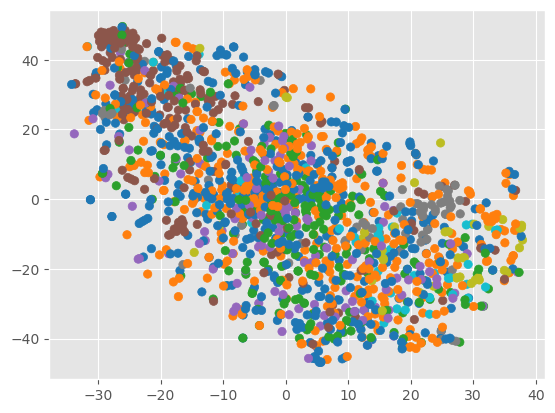

In [16]:
plt.style.use('ggplot')

# plot
x = reduced[:, 0]
y = reduced[:, 1]
classes = [x for x in data['verb_class']]
labels = [x for x in data['verb']]
plt.scatter(x, y, c=classes, label=labels, cmap="tab10")
# plt.legend()
plt.show()

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


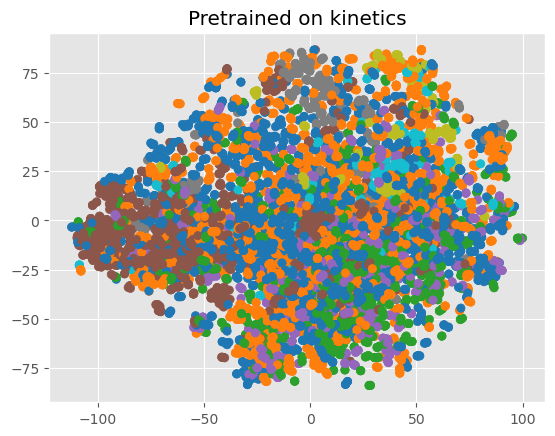

In [17]:
visualize_features("Pretrained on kinetics","saved_features/PT_D_16f_5c_D1_train.pkl", "train_val/D1_train.pkl")

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


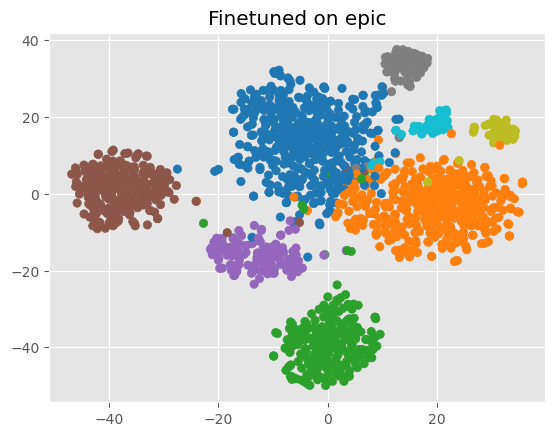

In [20]:
visualize_features("Finetuned on epic","saved_features/FT_D_16f_5c_D1_train.pkl", "train_val/D1_train.pkl")

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


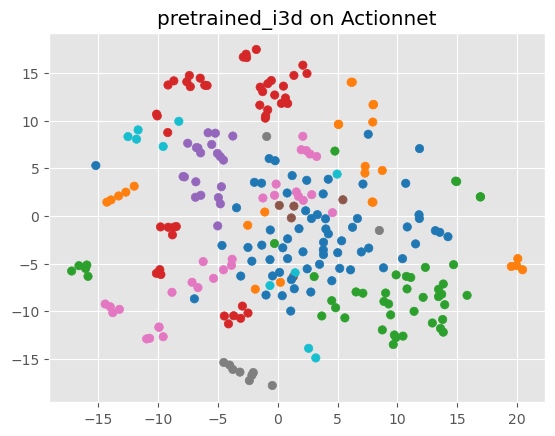

In [16]:
visualize_features("pretrained_i3d on Actionnet", "saved_features/PT_D_S04_8f_5c_S04_train.pkl", "train_val/S04_train.pkl")